In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import string
from os.path import join 
import os
import pickle
%matplotlib inline

import pandas as pd

DATA = 'transcripts'


#~ data = pd.read_pickle(join(DATA,"transcripts.pkl"))
data = pd.read_pickle(join(DATA,"clean.pkl"))


from polyglot.text import Text  

pol = lambda x: Text(x).polarity

data['polarity'] = data['text'].apply(pol)


Text(0.5, 0, '<-- Negative -------- Positive -->')

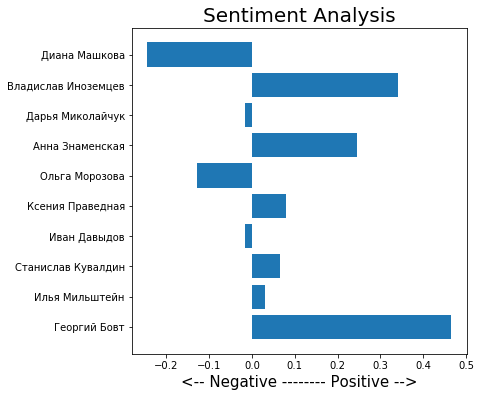

In [3]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [6, 6]
plt.figure()
y_pos =  list(data.full_name)
plt.barh(y_pos, data.polarity, align='center')
plt.yticks(y_pos, data.full_name)
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)


Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.


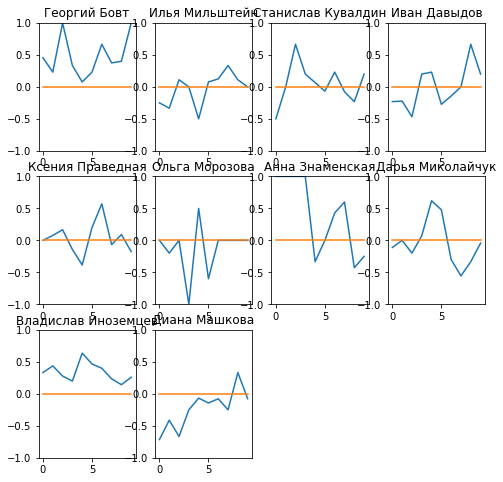

In [4]:
#~ Sentiment of Routine Over Time

import numpy as np
#import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = int(np.floor(length / n))
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list


# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.text:
    split = split_text(t, n=10)
    list_pieces.append(split)
    

# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        try:
            polarity_piece.append(Text(p).polarity)
        except:
            polarity_piece.append(0.0)
    polarity_transcript.append(polarity_piece)
    


# Show the plot for all authors
plt.rcParams['figure.figsize'] = [8, 8]

plt.figure()
for index, author in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-1.0, ymax=1.0)
    

